In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
import numpy as np

In [2]:
def plot(folder='curve/pretrained', dataset='cifar10', model='vgg16', optimizers=['SGDM','Adam','AEGD','AEGDM'], 
        curve_type='test_acc', ylim=[40,75], figsize=(5,4)):
    
    filenames = [name for name in os.listdir(folder) if name.startswith('-'.join([dataset,model]))]
    paths = [os.path.join(folder, name) for name in filenames]
    keys = [name.split('-')[2] for name in filenames]
    curve_data = {key: torch.load(fp) for key, fp in zip(keys, paths)}

    plt.figure(figsize=figsize)
    for optim in optimizers:
        if optim == 'AEGDM':
            linestyle = '-'
        else:
            linestyle = '--'
        plt.plot(np.array(curve_data[optim]['{}'.format(curve_type)]), label=optim)
       
    plt.xlabel('Epoch')
    plt.ylabel('Train Loss' if curve_type=='train_loss' else 'Test Accuracy %')
    plt.ylim(ylim)
    plt.grid(ls='--')
    plt.legend()
    plt.show()

## VGG16

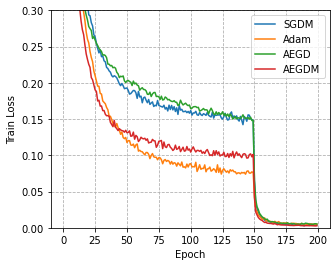

In [3]:
plot(dataset='cifar10', model='vgg16', curve_type='train_loss', ylim=[0,0.3])

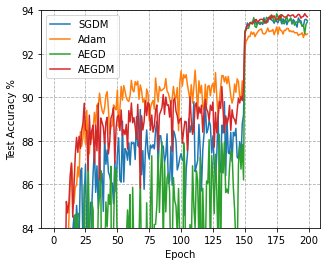

In [4]:
plot(dataset='cifar10', model='vgg16', curve_type='test_acc', ylim=[84,94])

## ResNet32

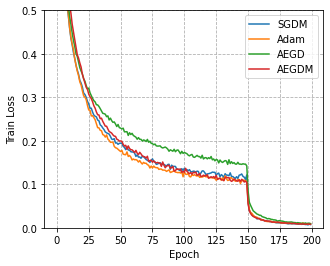

In [5]:
plot(dataset='cifar10', model='resnet32', curve_type='train_loss', ylim=[0,0.5])

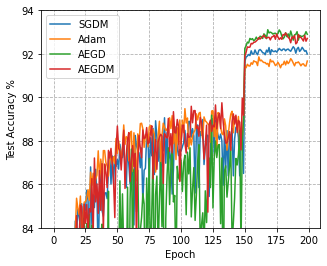

In [6]:
plot(dataset='cifar10', model='resnet32', curve_type='test_acc', ylim=[84,94])

## Densenet121

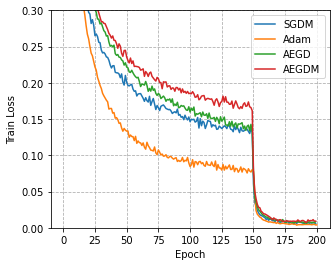

In [7]:
plot(dataset='cifar10', model='densenetbc12', curve_type='train_loss', ylim=[0,0.3])

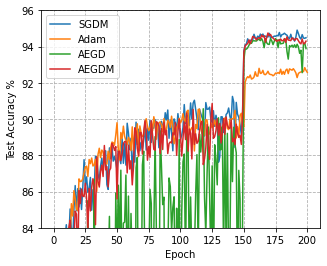

In [8]:
plot(dataset='cifar10', model='densenetbc12', curve_type='test_acc', ylim=[84,96])

## SqueezNet

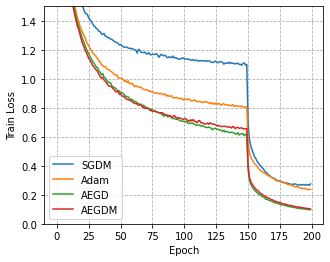

In [9]:
plot(dataset='cifar100', model='squeezenet', curve_type='train_loss', ylim=[0,1.5])

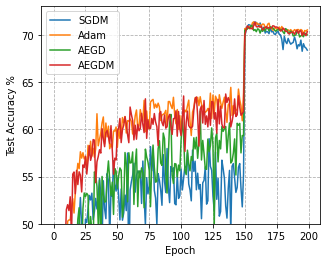

In [10]:
plot(dataset='cifar100', model='squeezenet', curve_type='test_acc', ylim=[50,73])

## Googlenet

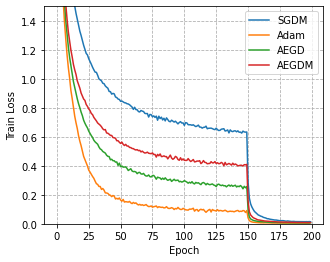

In [11]:
plot(dataset='cifar100', model='googlenet', curve_type='train_loss', ylim=[0,1.5])

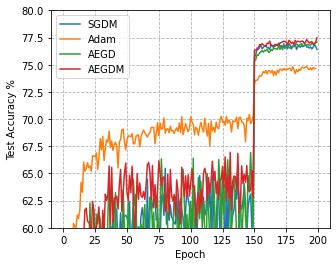

In [12]:
plot(dataset='cifar100', model='googlenet', curve_type='test_acc', ylim=[60,80])